#  Credit Card Default


## Kaggle's Credit Card Fraud Dataset - RF



The data is from: https://www.kaggle.com/mlg-ulb/creditcardfraud

Note that there are 28 anonymized variables in the data set and the charge amount. The variable "Class" is 0 for no fraud and 1 if the charge was fraudulent. 

The data set is in your data folder.

In [1]:
%pylab inline
import pandas as pd
import os
from ipypublish import nb_setup
%load_ext rpy2.ipython

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv("DSTMAA_data/creditcard.csv")

In [3]:
data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import cross_val_predict

from sklearn.metrics import confusion_matrix

import warnings 
warnings.filterwarnings("ignore")

In [5]:
len(data)

284807

<b><i>There are 284807 observations in the data.</i></b>

In [6]:
((data.Class == 1).mean())*100

0.1727485630620034

##### The percentage of fradulent claims is 0.173%

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

In [8]:
#Dependent categorical variable
y = data.Class

In [9]:
x = data.drop(columns = "Class")

In [10]:
# splitting dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0)

In [11]:
#Running a logistics regression for the training data
model = LogisticRegression()
model = model.fit(X_train, y_train)

In [12]:
# Accuracy on the training set
model.score(X_train, y_train)

0.9989204485902945

In [13]:
#predicting y on training data set
predicted_train = model.predict(X_train)

In [14]:
# Confusion Matrix
print(confusion_matrix(predicted_train, y_train))

[[190408    124]
 [    82    206]]


In [15]:
# Accuracy on the test set
model.score(X_test, y_test)

0.9989466628363497

In [16]:
predicted_test = model.predict(X_test)

In [17]:
# Confusion Matrix 
print(confusion_matrix(predicted_test, y_test))

[[93792    66]
 [   33    96]]


<b> Since,our dataset is imbalanced the accuracy is only reflecting the underlying class distribution which in this case 
is majority non-fradulent cases. Therefore, we need to compute other metrices like precision, recall and F1 score
using confusion matrix to detect overfitting.</b>

In [18]:
# Computing precision, recall and F1 score for training data
print(classification_report(predicted_train, y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    190532
           1       0.62      0.72      0.67       288

   micro avg       1.00      1.00      1.00    190820
   macro avg       0.81      0.86      0.83    190820
weighted avg       1.00      1.00      1.00    190820



In [19]:
# Computing precision, recall and F1 score for test data
print(classification_report(predicted_test, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93858
           1       0.59      0.74      0.66       129

   micro avg       1.00      1.00      1.00     93987
   macro avg       0.80      0.87      0.83     93987
weighted avg       1.00      1.00      1.00     93987



<b>Recall is the important metric for our analysis, since bank would not like to incur losses due to fradulent charges.
However, precision is also important since blocking genuine transactions can potentially lead to customer dissatisfaction. Therefore, we are looking at  F1 score to determine overfitting. Since F1 score has decreased only by 1%, there doesn't seem to be significant overfitting.</b>

<b>Apart from precision, recall and F1 score we have also computed AUC score and plotted the ROC curve </b>

In [20]:
# Generate class probabilities
probs = model.predict_proba(X_test)
print(probs)

[[9.99994477e-01 5.52269625e-06]
 [9.99999742e-01 2.58332076e-07]
 [9.99999471e-01 5.28880637e-07]
 ...
 [9.98495813e-01 1.50418740e-03]
 [9.99997609e-01 2.39104045e-06]
 [9.99993325e-01 6.67509284e-06]]


In [21]:
# generate evaluation metrics
print('Accuracy =', accuracy_score(y_test, predicted_test))
print('AUC =', roc_auc_score(y_test, probs[:, 1]))

Accuracy = 0.9989466628363497
AUC = 0.8985209527850971


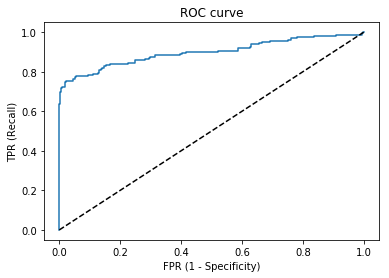

Area under curve (AUC):  0.8985209527850971


In [22]:
#ROC, AUC
from sklearn.metrics import roc_curve, auc
y_score = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)

title('ROC curve')
xlabel('FPR (1 - Specificity)')
ylabel('TPR (Recall)')

plot(fpr,tpr)
plot((0,1), ls='dashed',color='black')
plt.show()
print('Area under curve (AUC): ', auc(fpr,tpr))

<li><b>As explained earlier, since recall is the most important metric for fraud detection, a recall of 0.74 might be too low as it will ultimately result in business losses. </li>
<li>Also, the AUC score of 89% is not satisfactory. This also reflected by the ROC curve which shows that for a TPR of greater than 0.8 increases the FPR at a higher rate which is not satisfactory for fraud detection. </li></b>

<b>Cross Validation:</b> We are using CV for removing biasness by ensuring that the test-train split is random. This will also help us in identifying overfitting. 

Cross validation on <b> Train Data : </b>

In [23]:
scores = cross_val_score(model, X_train, y_train, cv=10)
y_pred = cross_val_predict(model, X_train, y_train, cv=10)
conf_mat = confusion_matrix(y_train, y_pred)
conf_mat

array([[190428,     62],
       [   127,    203]], dtype=int64)

In [24]:
# Accuracy :
scores.mean()

0.9990095377842995

Cross validation model on <b> Test Data:</b>

In [25]:
scores_test = cross_val_score(model, X_test, y_test, cv=10)
y_pred_test = cross_val_predict(model, X_test, y_test, cv=10)
conf_mat_test = confusion_matrix(y_test, y_pred_test)
conf_mat_test

array([[93794,    31],
       [   69,    93]], dtype=int64)

In [26]:
#Accuracy on Test Data:
scores_test.mean()

0.9989360253228998

In [27]:
# cross validation- classification report on train data:
print(classification_report(y_pred, y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    190555
           1       0.62      0.77      0.68       265

   micro avg       1.00      1.00      1.00    190820
   macro avg       0.81      0.88      0.84    190820
weighted avg       1.00      1.00      1.00    190820



In [28]:
# cross validation- classification report on test data:
print(classification_report(y_pred_test, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93863
           1       0.57      0.75      0.65       124

   micro avg       1.00      1.00      1.00     93987
   macro avg       0.79      0.87      0.82     93987
weighted avg       1.00      1.00      1.00     93987



Cross Validation improved the recall by 0.01. However, the F1 score decreased by 0.01. Also, CV did not indicate any significant overfitting

Cross Validation metrics results:
1. Increased recall from 0.74 to 0.75 
2. Decreased f1 score from 0.66 to 0.65
3. Decreased precision from 0.59 to 0.57        

Also, CV did not indicate any significant overfitting

<b> SMOTE :</b> Since the data is imbalanced, we will use the oversampling method SMOTE to increase the number of records for minority class.

In [29]:
from imblearn.over_sampling import SMOTE

In [30]:
over = SMOTE(random_state=0)

columns = X_train.columns

over_X,over_Y = over.fit_sample(X_train, y_train)

over_X = pd.DataFrame(data=over_X,columns=columns )

over_Y= pd.DataFrame(data=over_Y,columns=['y'])

print("total rows",len(over_X))
print("non-fradulent",len(over_Y[over_Y['y']==0]))
print("fradulent",len(over_Y[over_Y['y']==1]))
X_smote_train = over_X
Y_smote_train = over_Y['y']


total rows 380980
non-fradulent 190490
fradulent 190490


### cross validation over smote

In [31]:
model1 = LogisticRegression()
model1 = model1.fit(X_smote_train, Y_smote_train)

In [32]:
scores_smote = cross_val_score(model1, X_smote_train, Y_smote_train, cv=10)
y_pred_smote = cross_val_predict(model1, X_test, y_test, cv=10)
conf_mat_smote = confusion_matrix(y_pred_smote,y_test)
conf_mat_smote

array([[93794,    69],
       [   31,    93]], dtype=int64)

In [33]:
scores_smote_test = cross_val_score(model1, X_test, y_test, cv=10)
scores_smote.mean()

0.9692949761142315

In [34]:
# cross validation- classification report on test data:
print(classification_report(y_pred_smote, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93863
           1       0.57      0.75      0.65       124

   micro avg       1.00      1.00      1.00     93987
   macro avg       0.79      0.87      0.82     93987
weighted avg       1.00      1.00      1.00     93987



<b> Xgboost :</b> We are using Xgboost to improve the performance by penalizing the incorrect predicitons

In [35]:
from xgboost import *
model2 = XGBClassifier(objective='reg:logistic')
model2.fit(X_train, y_train)

y_pred1 = model2.predict(X_test)


print(classification_report(y_pred1, y_test))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93851
           1       0.78      0.93      0.85       136

   micro avg       1.00      1.00      1.00     93987
   macro avg       0.89      0.97      0.93     93987
weighted avg       1.00      1.00      1.00     93987



Xgboost increased the performance of recall, precision and f1 score significantly.                                     
1. Recall increased from 0.74 to 0.93                                          
2. f1 score increased from 0.66 to 0.85                                        
3. Precision increased from 0.59 to 0.78           
   